In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data_f1.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
flight_counts = df.groupby('Airline').size().reset_index(name='Flight_Count')
flight_counts

,Airline,Flight_Count
0,Air Asia,319
1,Air India,1752
2,GoAir,194
3,IndiGo,2053
4,Jet Airways,3849
5,Jet Airways Business,6
6,Multiple carriers,1196
7,Multiple carriers Premium economy,13
8,SpiceJet,818
9,Trujet,1


In [17]:
flight_counts.columns

Index(['Airline', 'Flight_Count'], dtype='object')

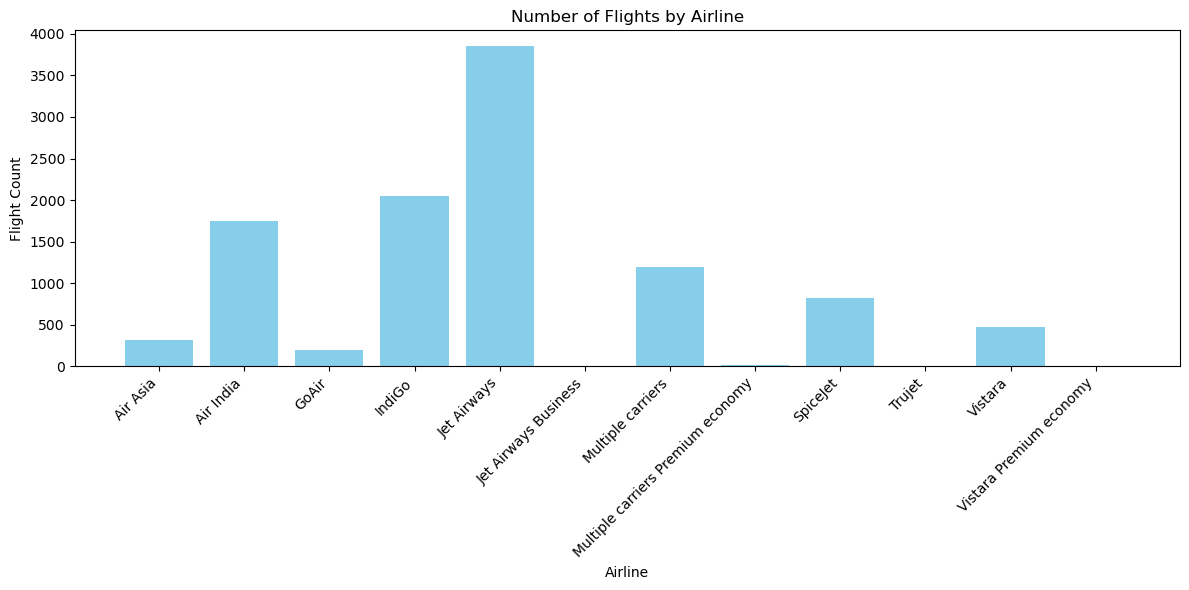

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(flight_counts['Airline'], flight_counts['Flight_Count'], color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.title('Number of Flights by Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout for readability
plt.show()

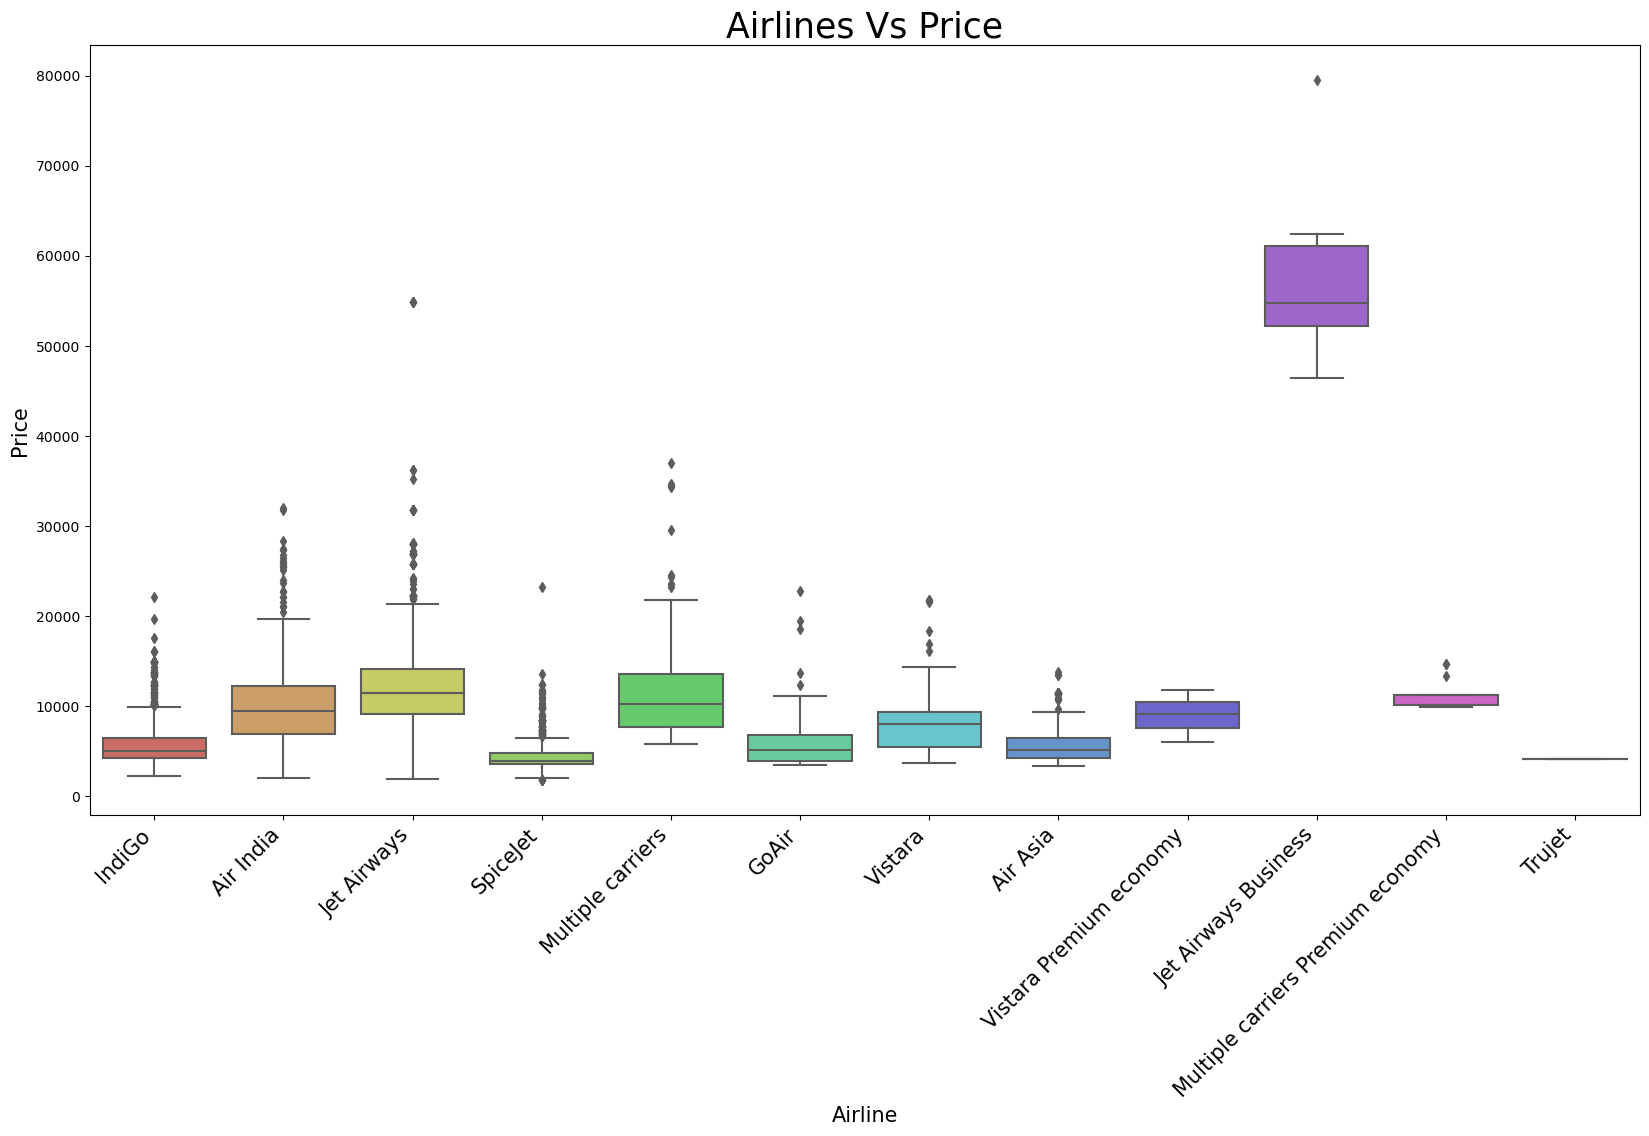

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Airline'],y=df['Price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=25)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=45, ha='right',fontsize=15)
plt.show()

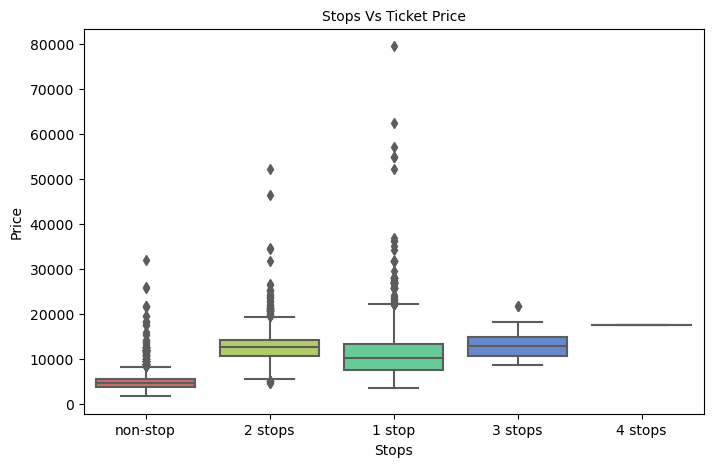

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Stops',y='Price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=10)
plt.xlabel('Stops',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.show()

In [49]:
# Convert Dep_Time and Arrival_Time to datetime, then extract the hour
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M', errors='coerce').dt.hour

In [52]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Dep_Time_Category'] = df['Dep_Hour'].apply(time_of_day)
df['Arrival_Time_Category'] = df['Arrival_Hour'].apply(time_of_day)

dep_price_summary = df.groupby('Dep_Time_Category')['Price'].mean().reset_index()
arrival_price_summary = df.groupby('Arrival_Time_Category')['Price'].mean().reset_index()
dep_price_summary

,Dep_Time_Category,Price
0,Afternoon,9392.816658
1,Evening,9178.833263
2,Morning,9202.281555
3,Night,8179.469767


In [53]:
arrival_price_summary

,Arrival_Time_Category,Price
0,Afternoon,7422.147735
1,Evening,9460.390787
2,Morning,5413.321582
3,Night,10052.520072


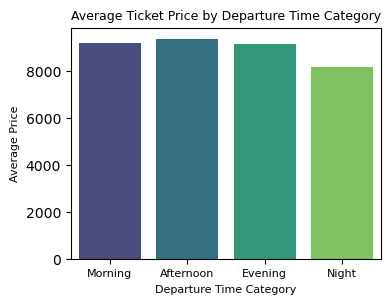

In [70]:
# How the Ticket Price change based on the Departure Time?
plt.figure(figsize=(4, 3))
order = ['Morning', 'Afternoon', 'Evening', 'Night']
sns.barplot(x='Dep_Time_Category', y='Price', data=dep_price_summary, palette='viridis', order=order)
plt.title('Average Ticket Price by Departure Time Category',fontsize=9)
plt.xlabel('Departure Time Category',fontsize=8)
plt.ylabel('Average Price',fontsize=8)
plt.xticks(fontsize=8)
plt.show()

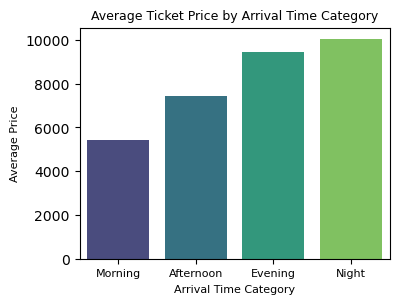

In [69]:
# How the Ticket Price change based on the Arrival Time?
plt.figure(figsize=(4, 3))
sns.barplot(x='Arrival_Time_Category', y='Price', data=arrival_price_summary, palette='viridis', order=order)
plt.title('Average Ticket Price by Arrival Time Category',fontsize=9)
plt.xlabel('Arrival Time Category',fontsize=8)
plt.ylabel('Average Price',fontsize=8)
plt.xticks(fontsize=8)
plt.show()

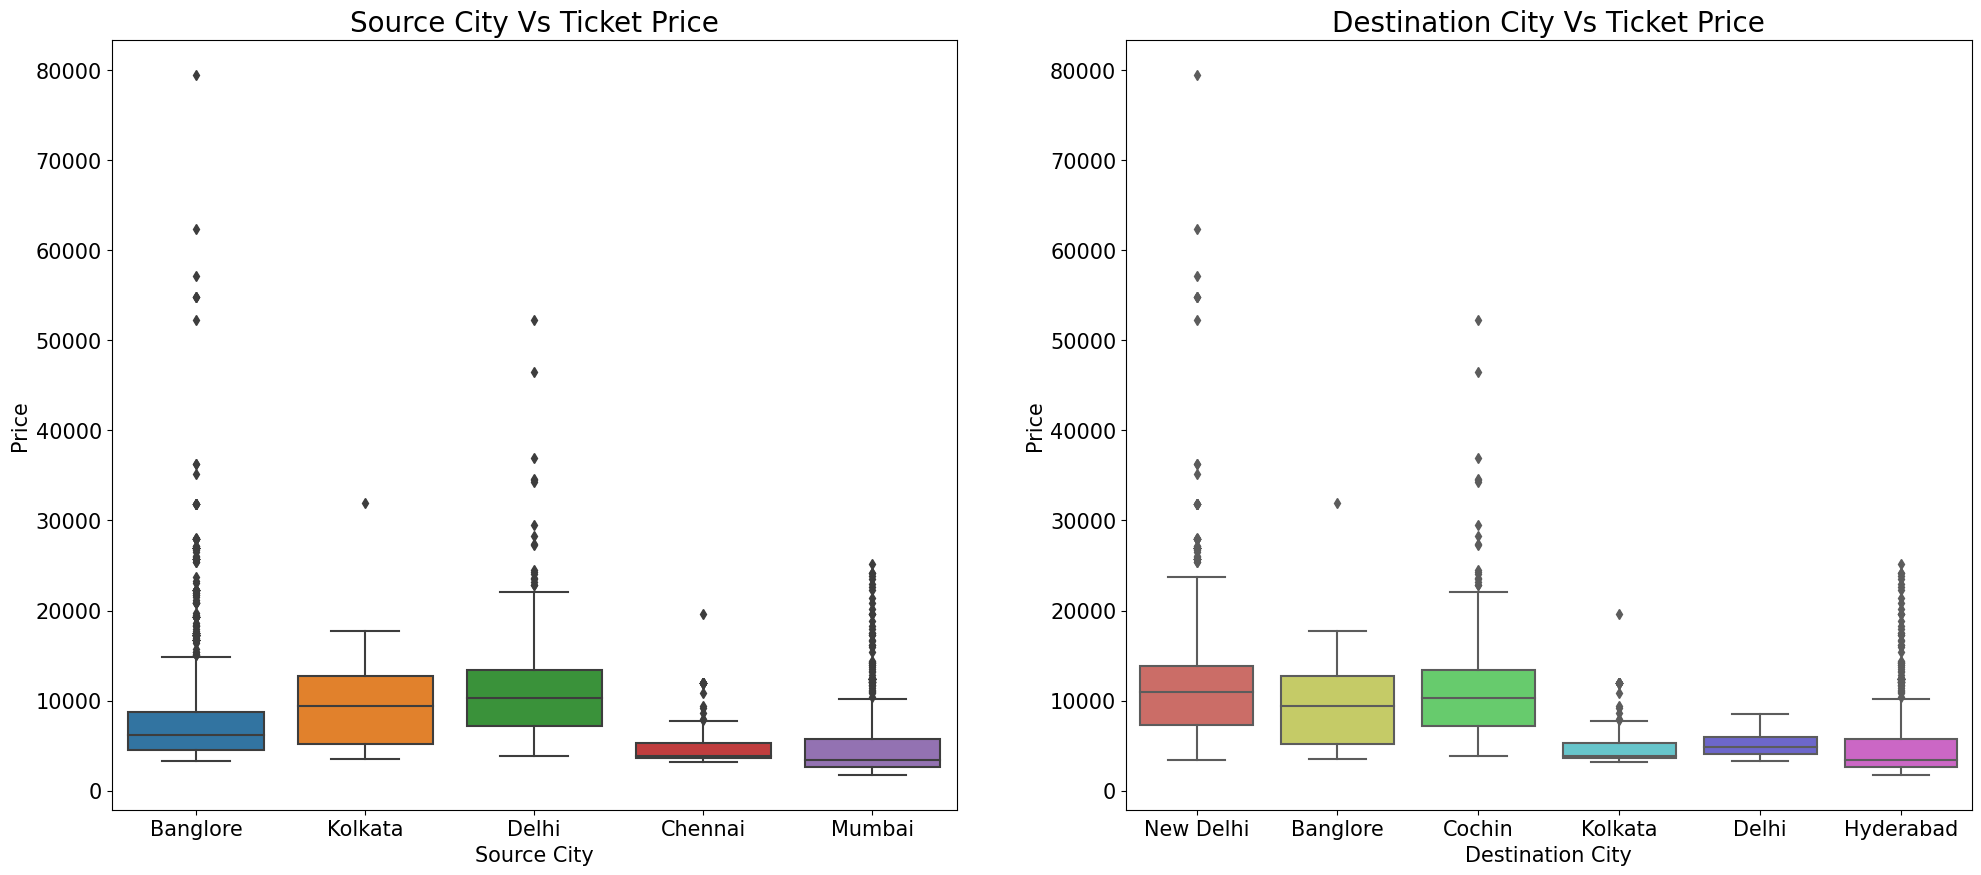

In [76]:
# How the price changes with change in Source city and Destination city? 
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Source',y='Price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()